In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

### Decision Trees

Сгенерируем выборку с классами, расположенными в виде "луны" и попробуем построить решающее дерево!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 500

In [4]:
### Генерим датасет

from sklearn.datasets import make_moons

dataset = make_moons(n_samples=1000,
                     noise=0.5,
                     random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))),
                       columns=["x1", "x2", "y"])

dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


In [5]:
dataset.y.value_counts()

0.0    500
1.0    500
Name: y, dtype: int64

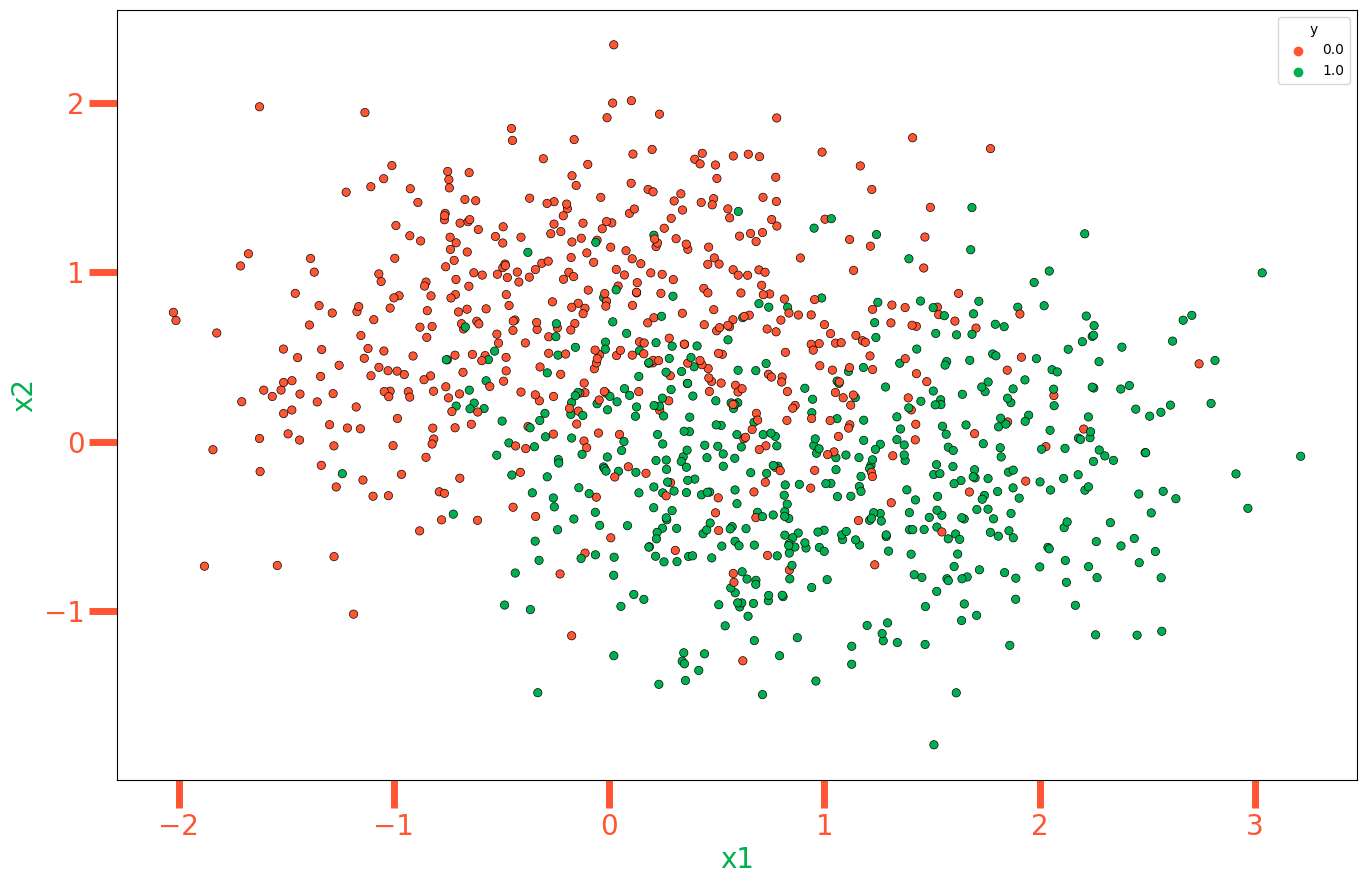

In [6]:
### Изобразим объекты и раскрасим их в классы

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.scatterplot(x="x1",
                y="x2",
                hue="y",
                edgecolor="k",
                palette=["#FF5533", "#00B050"],
                data=dataset)

plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop("y", axis=1)
y = dataset["y"]

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

DecisionTreeClassifier()

In [9]:
### Замерим accuracy!

decision_tree.score(X, y)

1.0

Text(0.5, 1.0, 'Decision Boundary')

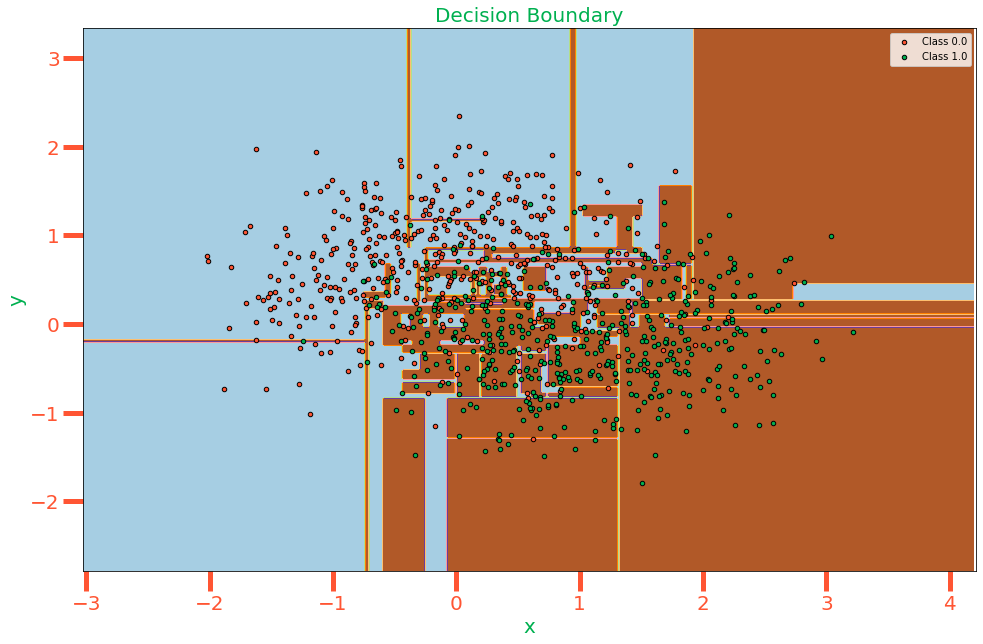

In [33]:
fig = plt.figure()
fig.set_size_inches(16, 10)

### Вычислим границы признакового пространства

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

In [36]:
X_2, y_2 = X[:500], y[:500]

In [37]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_2, y_2)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Decision Boundary')

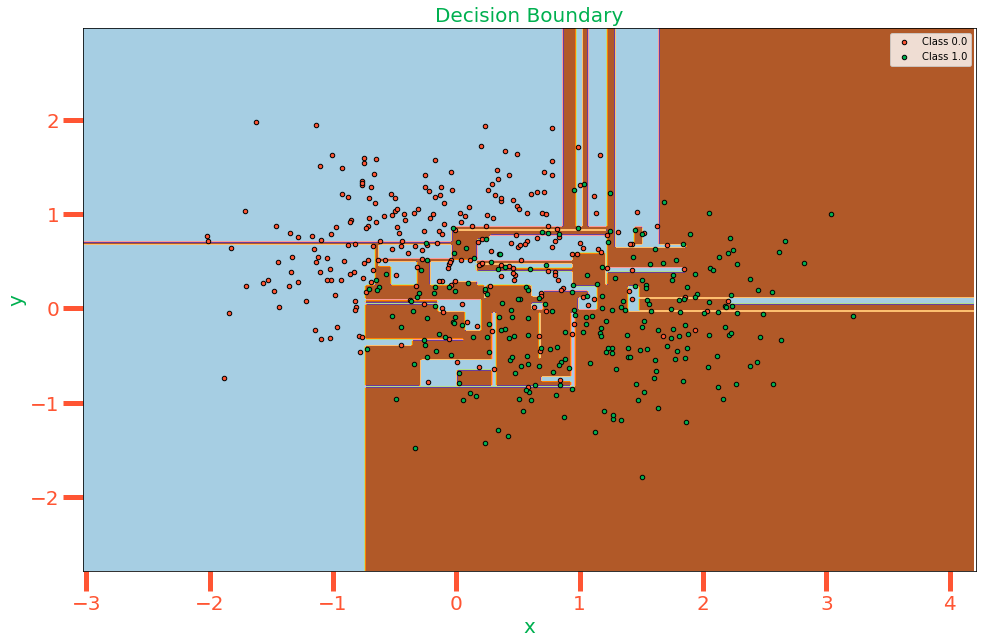

In [38]:
fig = plt.figure()
fig.set_size_inches(16, 10)

### Вычислим границы признакового пространства

pixel_step = 0.02

x1_min, x1_max = X_2.values[:, 0].min() - 1, X_2.values[:, 0].max() + 1
x2_min, x2_max = X_2.values[:, 1].min() - 1, X_2.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y_2 == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

Accuracy равно: 0.842


Text(0.5, 1.0, 'Decision Boundary')

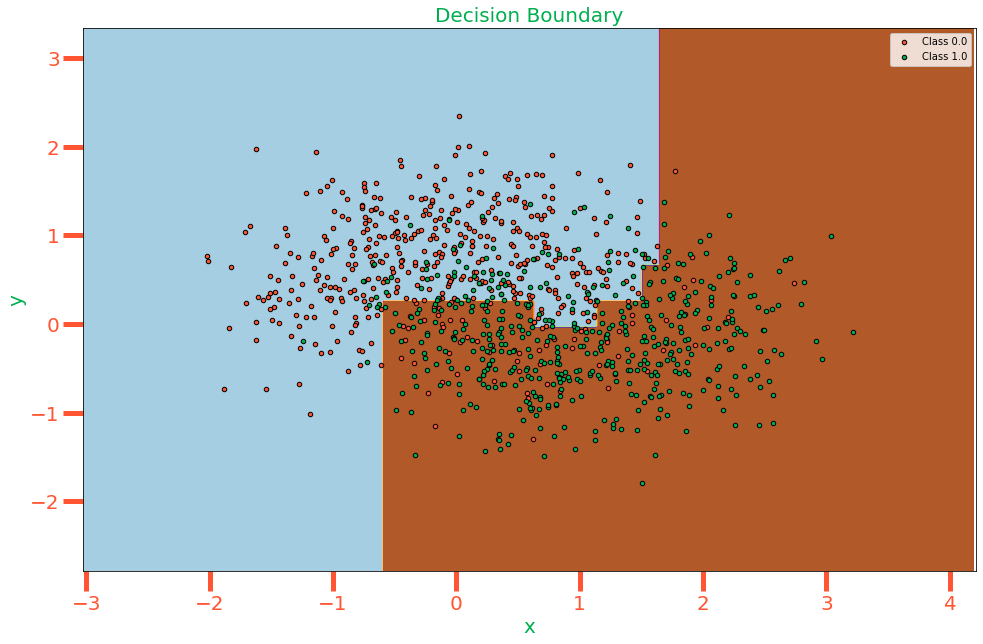

In [39]:
### Поковыряем гиперпараметры дерева

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

decision_tree.fit(X, y)

print(f"Accuracy равно: {decision_tree.score(X, y).round(3)}")

fig = plt.figure()
fig.set_size_inches(16, 10) 

### Вычислим границы признакового пространства

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

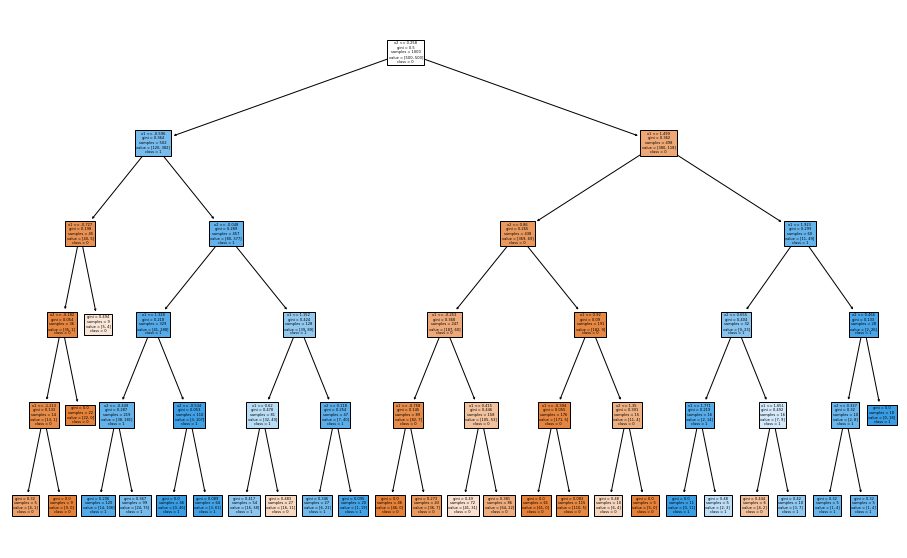

In [44]:
### Изобразим дерево в виде графа!

from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
decision_tree.fit(X, y)

fig = plt.figure()
fig.set_size_inches(16, 10) 

tree.plot_tree(decision_tree,
               feature_names=X.columns,
               class_names=decision_tree.classes_.astype(int).astype(str),
               filled=True
           )
plt.show()

In [12]:
### А теперь на отложенной выборке

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0, 
                                                    test_size=0.2)

decision_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1)

decision_tree.fit(X_train, y_train)

print(f"Accuracy равно на трейне: {decision_tree.score(X_train, y_train).round(3)}")
print(f"Accuracy равно на тесте: {decision_tree.score(X_test, y_test).round(3)}")

Accuracy равно на трейне: 1.0
Accuracy равно на тесте: 0.705


In [13]:
### А теперь на отложенной выборке

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0, 
                                                    test_size=0.2)

decision_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=2)

decision_tree.fit(X_train, y_train)

print(f"Accuracy равно на трейне: {decision_tree.score(X_train, y_train).round(3)}")
print(f"Accuracy равно на тесте: {decision_tree.score(X_test, y_test).round(3)}")

Accuracy равно на трейне: 0.941
Accuracy равно на тесте: 0.71


In [14]:
### А теперь на отложенной выборке

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0, 
                                                    test_size=0.2)

decision_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=3)

decision_tree.fit(X_train, y_train)

print(f"Accuracy равно на трейне: {decision_tree.score(X_train, y_train).round(3)}")
print(f"Accuracy равно на тесте: {decision_tree.score(X_test, y_test).round(3)}")

Accuracy равно на трейне: 0.911
Accuracy равно на тесте: 0.755


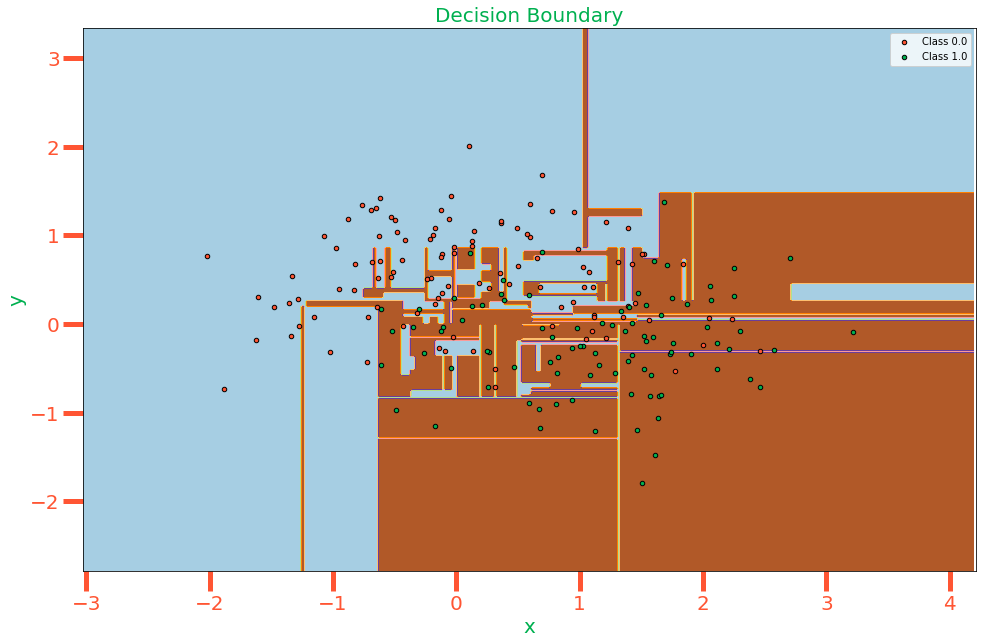

In [48]:
fig = plt.figure()
fig.set_size_inches(16, 10) 

### Вычислим границы признакового пространства

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

preds = decision_tree.predict(X_test)

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(preds == i)
    plt.scatter(
        X_test.values[idx, 0],
        X_test.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

plt.show()

### Добавить нелинейность!

Пусть имели 2 признака: $x_1$, $x_2$, описывающие Сумму кредита и Возраст клиента соответственно, и выделили из них один общий признак: $d^{new} = x_1 + x_2^3 + 3x_2^2 + x_2$

Попробуем построить модель решающего дерева на таком новом признаке.

Для этого нам придется подбирать лучшие пороги `t` для нового предиката  $[d^{new} <= t]$

Положим, выбрали $t^* = 3$. Как такой предикат разделит изначальное пространство базовых признаков?

<div>
<img src="Рисунок1.png" width="400"/>
</div>

Таким образом, во время строительства дерева можно придумывать какие-то нелинейные комбинации базовых признаков, тогда полученные разбиения могут иметь нелинейную форму!

In [50]:
def new_feature(x1, x2):
    
    return 2*x1**3 - 3*x1**2 - x1 - x2

X_new = X.copy()

X_new['new_feature'] = new_feature(X.values[:, 0], X.values[:, 1])

X_new.head()

,x1,x2,new_feature
0,2.216430,0.741684,4.080901
1,2.057427,0.424853,2.236898
2,-0.116847,0.004159,0.068537
3,-0.710797,0.210482,-1.733619
4,0.267548,-0.460654,0.016663


Вместо того, чтобы ручками менять датасеты каждый раз, когда хотим обучить модель с новой фичей, можно ее создание добавить в `Pipeline`!

Для этого в начале создадим свой кастомный класс-трансформер `CustomFunctionTransformer`

Чтобы шаг с трансформацией данных плавно вошел в `Pipeline`, будем требовать наличие следующих методов:

1. `fit`
2. `transform`
3. `fit_transform`

Если унаследоваться от классов `BaseEstimator` и `TransformerMixin` из `sklearn.base`, то можно будет опустить третий метод, оставив только `fit` и `transform`, а так же будут доступны некоторые уже встроенные радости: например, методы `get_params` и т.д.

Пусть наш трансфоормер делает следующее: берет название двух колонок `first_col` и `second_col`, а потом применяет к ним некоторую кастомную функцию `function`, результат запишем в колонку `new_feature`.

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [52]:
### Проверим работоспособность!

custom_class = CustomFunctionTransformer("x1", "x2",
                                         lambda x,y: 2*x**3 - 3*x**2 - x - y)

custom_class.fit(X)

custom_class.transform(X)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


,new_feature
0,4.080901
1,2.236898
2,0.068537
3,-1.733619
4,0.016663
...,...
995,-1.345270
996,-1.256273
997,0.394222
998,-0.610251


In [54]:
custom_class.get_params()

{'first_col': 'x1',
 'function': <function __main__.<lambda>(x, y)>,
 'second_col': 'x2'}

In [55]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("custom_transformer",
                  CustomFunctionTransformer("x1",
                                            "x2",
                                            lambda x,y: 2*x**3 - 3*x**2 - x - y)),
                 ("decision_tree",
                  DecisionTreeClassifier(max_depth=2))])

pipe.fit(X, y)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x135356820>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

Трансформировали датасет!


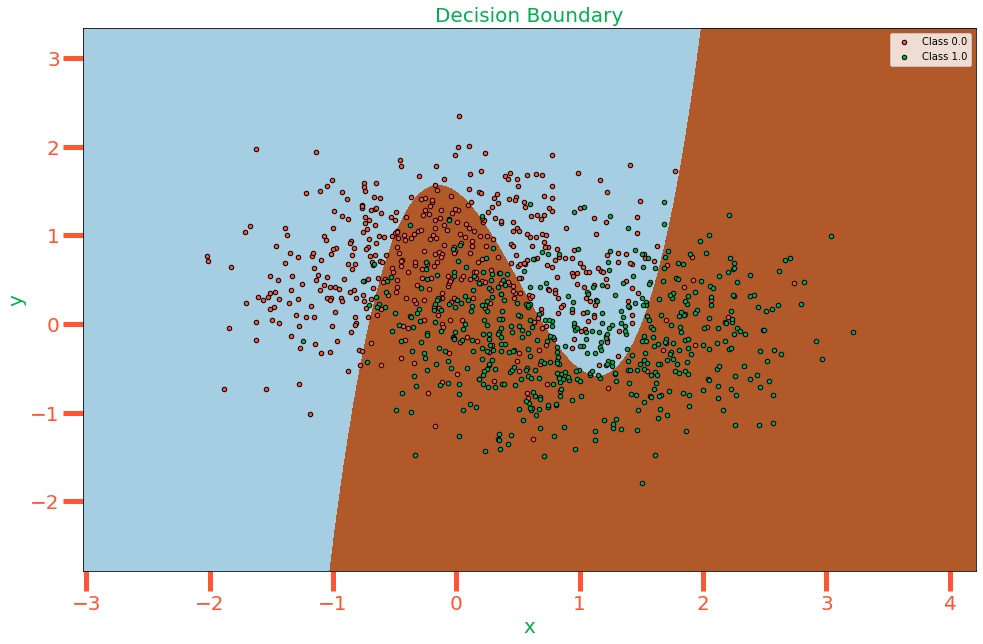

In [56]:
fig = plt.figure()
fig.set_size_inches(16, 10) 

### Вычислим границы признакового пространства

pixel_step = 0.001

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

plt.show()